# Цель занятия
На этом занятии мы рассмотрим подробно метрики качества работы алгоритмов, работающих с задачами регрессии и классификации.

Метрики качества в машинном обучении нужны для оценки качества работы алгоритмов. Они позволяют сравнивать разные модели машинного обучения и выбирать наилучшую для конкретной задачи. Кроме того, метрики качества позволяют определить, насколько хорошо обученная модель справляется с поставленной перед ней задачей и насколько ее результаты достоверны.

Например, метрики качества для задачи классификации позволяют определить, насколько точно модель предсказывает метки классов для тестовых данных. А метрики качества для задачи регрессии позволяют определить, насколько близко предсказанные значения к истинным.

Метрики качества могут быть использованы для выбора оптимального набора гиперпараметров модели,  для настройки ее параметров, а также для сравнения разных алгоритмов машинного обучения и выбора наилучшего из них.

# Используемые библиотеки

**Scikit-learn (также известный как sklearn)** - это библиотека машинного обучения на языке Python, которая предоставляет широкий спектр инструментов для решения задач классификации, регрессии, кластеризации, снижения размерности, выбора моделей и многих других. Библиотека основана на библиотеках NumPy, SciPy и matplotlib и имеет простой и интуитивно понятный интерфейс, что делает ее доступной для использования как для начинающих, так и для продвинутых пользователей.

In [1]:
# Импорт библиотек и необходимых функций
import numpy as np

np.random.seed(1)
import sklearn.metrics as metrics

# Метрики качества регрессии

Метрики качества регрессии - это числовые характеристики, которые используются для оценки того, насколько хорошо модель регрессии соответствует данным. Ниже приведены некоторые из наиболее распространенных метрик качества регрессии с примерами.

In [2]:
# генерируем 100 случайных значений в диапазоне 0 - 1 для "реальных" значений
y_test_reg = np.random.rand(100)

# генерируем 100 случайных значений в диапазоне 0 - 1 для "предсказанных" значений
y_pred_reg = np.random.rand(100)

**Среднеквадратичная ошибка (MSE)** - это среднее значение квадратов разностей между прогнозируемыми значениями и фактическими значениями.
Формула для средней квадратичной ошибки (MSE) выглядит следующим образом:

$\mathrm{MSE} = \frac{1}{n}\sum_{i=1}^{n}\left(y_i - \hat{y}_i\right)^2$

где $n$ - количество примеров в выборке, $y_i$ - истинное значение для $i$-го примера, а $\hat{y}_i$ - предсказанное значение для $i$-го примера. В данной формуле $(y_i - \hat{y}_i)^2$ обозначает квадрат разности между истинным и предсказанным значением.
MSE особенно часто используется, когда существует линейная зависимость между признаками и целевой переменной. Это происходит, когда мы имеем дело с непрерывными переменными, такими как цена на недвижимость или доход.

Оценим качество прогнозов с помощью mean_squared_error из sklearn.metrics.

In [3]:
# оцениваем качество прогнозов с помощью среднеквадратической ошибки
mse = metrics.mean_squared_error(y_test_reg, y_pred_reg)

print("Среднеквадратическая ошибка:", mse)

Среднеквадратическая ошибка: 0.1913082933977216


**Средняя абсолютная ошибка (MAE)** - это среднее значение абсолютных разностей между прогнозируемыми значениями и фактическими значениями.
Формула для средней абсолютной ошибки (MAE) выглядит следующим образом:

$\mathrm{MAE} = \frac{1}{n}\sum_{i=1}^{n}\left|y_i - \hat{y}_i\right|$

где $n$ - количество примеров в выборке, $y_i$ - истинное значение для $i$-го примера, а $\hat{y}_i$ - предсказанное значение для $i$-го примера. Функция $\left|\cdot\right|$ обозначает модуль разности между истинным и предсказанным значением.

MAE чаще используется,  когда мы имеем дело с выбросами и выбивающимися значениями. Она более устойчива к выбросам, чем MSE.
Пример: Предположим, что у нас есть модель, которая прогнозирует цены на недвижимость. MAE для этой модели может быть рассчитана как среднее значение абсолютных разностей между прогнозируемыми ценами и реальными ценами.

Оценим качество прогнозов с помощью mean_absolute_error из sklearn.metrics.

In [4]:
# оцениваем качество прогнозов с помощью средней абсолютной ошибки
mae = metrics.mean_absolute_error(y_test_reg, y_pred_reg)

print("Средняя абсолютная ошибка:", mae)

Средняя абсолютная ошибка: 0.3601070155483342


**Функция потерь Хьюбера (Huber loss)** - это функция потерь, которая комбинирует свойства среднеквадратичной ошибки (MSE) и средней абсолютной ошибки (MAE) в зависимости от значения отклонения. Она используется для задач регрессии и оптимизации моделей машинного обучения.
Формула для функции потерь Хьюбера выглядит следующим образом:

$L_{\delta}(y, f(x)) = \begin{cases}
\frac{1}{2}(y - f(x))^2, & \text{if}\ \left|y - f(x)\right| \leq \delta \\
\delta\left(\left|y - f(x)\right| - \frac{\delta}{2}\right), & \text{otherwise}
\end{cases}$

где $y$ - истинное значение, $f(x)$ - предсказанное значение, а $\delta$ - параметр, который контролирует переход от MSE к MAE. 

Функция потерь Хьюбера вычисляется как среднее значение потерь для всех примеров.
Функция потерь Хьюбера более устойчива к выбросам, чем MSE, потому что она уменьшает вклад выбросов в общую ошибку. При этом, она сохраняет свойства MSE, когда отклонение мало, и свойства MAE, когда отклонение большое.
Пример: Предположим, что у нас есть модель, которая прогнозирует цены на недвижимость. Huber loss для этой модели может быть рассчитана как среднее значение функции потерь Хьюбера между прогнозируемыми ценами и реальными ценами. Параметр $\delta$ можно выбрать в зависимости от того, насколько сильно мы хотим уменьшить влияние выбросов на общую ошибку.

Вот пример использования функции потерь Хьюбера (Huber loss) в scikit-learn для обучения модели регрессии. Мы сначала создаем синтетические данные для регрессии с помощью функции make_regression, затем разбиваем данные на обучающую и тестовую выборки с помощью train_test_split. Мы обучаем модель регрессии с функцией потерь Хьюбера на обучающей выборке, используя класс HuberRegressor из модуля linear_model. Мы делаем прогнозы на тестовой выборке и оцениваем качество прогнозов с помощью mean_squared_error. В данном примере мы устанавливаем параметр epsilon равным 1.35, который задает пороговое значение между линейными и квадратичными значениями функции потерь. 

In [5]:
from sklearn.linear_model import HuberRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# создаем синтетические данные для регрессии
X, y = make_regression(n_samples=100, n_features=10, noise=0.5)

# разбиваем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test_reg = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# обучаем модель регрессии с функцией потерь Хьюбера на обучающей выборке
model = HuberRegressor(epsilon=1.35)
model.fit(X_train, y_train)

# делаем прогнозы на тестовой выборке
y_pred_reg = model.predict(X_test)

# оцениваем качество прогнозов с помощью среднеквадратической ошибки
mse = metrics.mean_squared_error(y_test_reg, y_pred_reg)

print("Среднеквадратическая ошибка:", mse)

Среднеквадратическая ошибка: 0.24702940693670242


Это только некоторые из наиболее распространенных метрик качества регрессии. В зависимости от задачи и данных, могут быть использованы и другие метрики.

# Метрики качества классификации

Метрики качества классификации - это числовые характеристики, которые используются для оценки того, насколько хорошо модель классификации соответствует данным. Ниже приведены некоторые из наиболее распространенных метрик качества классификации с примерами.

## Метрики качества бинарной классификации

**Точность (Accuracy)** - это доля правильных ответов модели относительно всех ответов.
Формула для точности (Accuracy) выглядит следующим образом:

$\mathrm{Accuracy} = \frac{\mathrm{TP}+\mathrm{TN}}{\mathrm{TP}+\mathrm{TN}+\mathrm{FP}+\mathrm{FN}}$

где $\mathrm{TP}$ - количество верно классифицированных примеров положительного класса, $\mathrm{TN}$ - количество верно классифицированных примеров отрицательного класса, $\mathrm{FP}$ - количество неверно классифицированных примеров положительного класса (ложно-положительные), $\mathrm{FN}$ - количество неверно классифицированных примеров отрицательного класса (ложно-отрицательные). Точность - это мера того, как часто классификатор правильно классифицирует примеры. Она используется в качестве метрики для оценки качества бинарной классификации.

Вот пример использования метрики точности (Accuracy) в scikit-learn

In [6]:
# создадим 20 значений 0 или 1 для "реальных" значений
y_test_cl = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# создадим 20 значений 0 или 1 для "предсказанных" значений
y_pred_cl = [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0]

# оцениваем качество прогнозов с помощью метрики точности
accuracy = metrics.accuracy_score(y_test_cl, y_pred_cl)

print("Точность:", accuracy)

Точность: 0.75


![alt text](../static/img/module_2_1.png)

**Точность положительного класса (Precision)** - это доля правильно классифицированных объектов положительного класса относительно всех объектов, которые модель классифицировала как положительный класс.
Формула для точности положительного класса (Precision) выглядит следующим образом:

$\mathrm{Precision} = \frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FP}}$

где $\mathrm{TP}$ - количество верно классифицированных примеров положительного класса, $\mathrm{FP}$ - количество неверно классифицированных примеров положительного класса (ложно-положительные). 

Точность положительного класса - это мера того, насколько точно классификатор классифицирует примеры как положительные. Она используется в качестве метрики для оценки качества бинарной классификации.

Вот пример использования метрики точности положительного класса (Precision) в scikit-learn

In [7]:
# создадим 20 значений 0 или 1 для "реальных" значений
y_test_cl = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# создадим 20 значений 0 или 1 для "предсказанных" значений
y_pred_cl = [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0]


# оцениваем точность положительного класса
precision = metrics.precision_score(y_test_cl, y_pred_cl)

print("Точность положительного класса:", precision)

Точность положительного класса: 0.6923076923076923


![alt text](../static/img/module_2_2.png)

**Полнота (Recall)** - это доля правильно классифицированных объектов положительного класса относительно всех объектов, которые на самом деле относятся к положительному классу.
Формула для полноты (Recall) выглядит следующим образом:

$\mathrm{Recall} = \frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FN}}$

где $\mathrm{TP}$ - количество верно классифицированных примеров положительного класса, $\mathrm{FN}$ - количество неверно классифицированных примеров положительного класса (ложно-отрицательные). 

Полнота - это мера того, насколько хорошо классификатор обнаруживает примеры положительного класса. Она используется в качестве метрики для оценки качества бинарной классификации.

Вот пример использования метрики полноты (Recall) в scikit-learn

In [8]:
# создадим 20 значений 0 или 1 для "реальных" значений
y_test_cl = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# создадим 20 значений 0 или 1 для "предсказанных" значений
y_pred_cl = [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0]

# оцениваем полноту положительного класса
recall = metrics.recall_score(y_test_cl, y_pred_cl)

print("Полнота положительного класса:", recall)

Полнота положительного класса: 0.9


![alt text](../static/img/module_2_3.png)

**F1-мера (F1-score)** - это гармоническое среднее между точностью и полнотой.
Формула для F1-меры (F1-score) выглядит следующим образом:

$\mathrm{F1} = 2\cdot\frac{\mathrm{Precision}\cdot\mathrm{Recall}}{\mathrm{Precision}+\mathrm{Recall}}$

где $\mathrm{Precision}$ - точность (precision), $\mathrm{Recall}$ - полнота (recall). F1-мера - это гармоническое среднее между точностью и полнотой. Она используется в качестве метрики для оценки качества бинарной классификации, когда необходимо учесть и точность, и полноту, и получить общую меру качества.

Вот пример использования метрики F1-меры (F1 score) в scikit-learn

In [10]:
# создадим 20 значений 0 или 1 для "реальных" значений
y_test_cl = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# создадим 20 значений 0 или 1 для "предсказанных" значений
y_pred_cl = [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0]

# оцениваем F1
f1 = metrics.f1_score(y_test_cl, y_pred_cl)

print("F1 положительного класса:", f1)

F1 положительного класса: 0.7826086956521738


![alt text](../static/img/module_2_4.png)

## Метрики качества многоклассовой классификации

In [24]:
# Считаем ответы, двигаясь по сетке слева-направо сверху-вниз
# создадим 30 значений 1,2,3 для "реальных" значений
y_test_cl = (
    [1] * 6
    + [3]
    + [1]
    + [3] * 2
    + [1] * 2
    + [2]
    + [1]
    + [3] * 2
    + [2]
    + [3]
    + [2] * 5
    + [3]
    + [2] * 2
    + [3] * 3
    + [2]
)

# создадим 30 значений 1,2,3 для "предсказанных" значений
y_pred_cl = (
    [1] * 4
    + [3]
    + [1] * 3
    + [3] * 2
    + [1] * 4
    + [3] * 4
    + [2] * 4
    + [3] * 2
    + [2] * 3
    + [3]
    + [2] * 2
)

![alt text](../static/img/module_2_5.png)

Micro Precision:
\begin{equation}
    \begin{gathered}
        P_{micro} = \frac{\sum_c TP_c}{\sum_c (TP_c + FP_c)},\\
        \text{где $TP_c$ - количество верно предсказанных положительных примеров класса $c$,}\\
        \text{$FP_c$ - количество ложно предсказанных положительных примеров класса $c$.}
    \end{gathered}
    \label{eq:Precision_micro}
\end{equation}

![alt text](../static/img/module_2_6.png)

Micro precision — это метрика, которая вычисляет точность для каждого класса по отдельности, а затем усредняет их с использованием общего числа истинных и ложных положительных и отрицательных ответов по всем классам. Эта метрика подходит для задач, где классы не сбалансированы и модель должна давать одинаковый вес каждому объекту.

In [25]:
micro_precision = metrics.precision_score(y_test_cl, y_pred_cl, average="micro")

print("Micro precision:", micro_precision)

Micro precision: 0.7666666666666667


Macro Precision:
\begin{equation}
    \begin{gathered}
        P_{macro} = \frac{1}{C}\sum_c P_c,\\
        \text{где $P_c$ - точность по классу $c$, $C$ - количество классов в задаче классификации.}
    \end{gathered}
    \label{eq:Precision_macro}
\end{equation}

Macro precision — это метрика, которая вычисляет точность для каждого класса по отдельности и затем усредняет их. Она не учитывает размеры классов, поэтому подходит для задач, где классы сбалансированы.

![alt text](../static/img/module_2_7.png)

In [26]:
macro_precision = metrics.precision_score(y_test_cl, y_pred_cl, average="macro")

print("Macro precision:", macro_precision)

Macro precision: 0.7653198653198654


Weighted Precision:
\begin{equation}
    \begin{gathered}
        P_{weighted} = \frac{\sum_c (TP_c + FP_c) \cdot P_c}{\sum_c (TP_c + FP_c)},\\
        \text{где $P_c$ - точность по классу $c$,}\\
        \text{$TP_c$ - количество верно предсказанных положительных примеров класса $c$,}\\
        \text{$FP_c$ - количество ложно предсказанных положительных примеров класса $c$.}
    \end{gathered}
    \label{eq:Precision_weighted}
\end{equation}

Weighted precision — это метрика, которая вычисляет точность для каждого класса по отдельности и затем усредняет их с использованием весов, пропорциональных размеру каждого класса. Она подходит для задач, где классы не сбалансированы и модель должна учитывать важность каждого класса.

![alt text](../static/img/module_2_8.png)

In [27]:
weighted_precision = metrics.precision_score(y_test_cl, y_pred_cl, average="weighted")

print("Weighted precision:", weighted_precision)

Weighted precision: 0.7653198653198653


![alt text](../static/img/module_2_9.png)

Micro Recall:
\begin{equation}
    \begin{gathered}
        R_{micro} = \frac{\sum_c TP_c}{\sum_c (TP_c + FN_c)},\\
        \text{где $TP_c$ - количество верно предсказанных положительных примеров класса $c$,}\\
        \text{$FN_c$ - количество ложно предсказанных отрицательных примеров класса $c$.}
    \end{gathered}
    \label{eq:Recall_micro}
\end{equation}

![alt text](../static/img/module_2_10.png)

In [28]:
micro_recall = metrics.recall_score(y_test_cl, y_pred_cl, average="micro")

print("Micro recall:", micro_recall)

Micro recall: 0.7666666666666667


Macro Recall:
\begin{equation}
    \begin{gathered}
        R_{macro} = \frac{1}{C}\sum_c R_c,\\
        \text{где $R_c$ - полнота по классу $c$, $C$ - количество классов в задаче классификации.}
    \end{gathered}
    \label{eq:Recall_macro}
\end{equation}

![alt text](../static/img/module_2_11.png)

In [29]:
macro_recall = metrics.recall_score(y_test_cl, y_pred_cl, average="macro")

print("Macro recall:", macro_recall)

Macro recall: 0.7666666666666666


Weighted Recall:
\begin{equation}
    \begin{gathered}
        R_{weighted} = \frac{\sum_c (TP_c + FN_c) \cdot R_c}{\sum_c (TP_c + FN_c)},\\
        \text{где $R_c$ - полнота по классу $c$,}\\
        \text{$TP_c$ - количество верно предсказанных положительных примеров класса $c$,}\\
        \text{$FN_c$ - количество ложно предсказанных отрицательных примеров класса $c$.}
    \end{gathered}
    \label{eq:Recall_weighted}
\end{equation}

![alt text](../static/img/module_2_12.png)

In [30]:
weighted_recall = metrics.recall_score(y_test_cl, y_pred_cl, average="weighted")

print("Weighted recall:", weighted_recall)

Weighted recall: 0.7666666666666667


Micro F1 score вычисляется путем усреднения всех TP (true positive), FP (false positive) и FN (false negative) для всех классов:

\begin{equation}
    \begin{gathered}
        Micro F1 = 2 * \frac{\sum_{i=1}^{n} TP_i}{\sum_{i=1}^{n}(TP_i + FP_i) + \sum_{i=1}^{n}(TP_i + FN_i)}
    \end{gathered}
    \label{eq:Micro_F1}
\end{equation}

![alt text](../static/img/module_2_13.png)

In [31]:
micro_f1 = metrics.f1_score(y_test_cl, y_pred_cl, average="micro")

print("Micro f1:", micro_f1)

Micro f1: 0.7666666666666667


Macro F1 score вычисляется путем усреднения F1 score для каждого класса:

\begin{equation}
    \begin{gathered}
        Macro F1 = \frac{1}{n} * \sum_{i=1}^{n} F1_i    \end{gathered}
    \label{eq:Macro_F1}
\end{equation}

![alt text](../static/img/module_2_14.png)

In [32]:
macro_f1 = metrics.f1_score(y_test_cl, y_pred_cl, average="macro")

print("Macro f1:", macro_f1)

Macro f1: 0.7646616541353383


Weighted F1 score вычисляется путем усреднения F1 score для каждого класса с учетом их весов. Веса могут быть определены как отношение количества образцов каждого класса к общему количеству образцов.
Формула для расчета Weighted F1 score:

\begin{equation}
    \begin{gathered}
        Weighted F1 = \frac{\sum_{i=1}^{n} w_i * F1_i}{\sum_{i=1}^{n} w_i,}\\
        \text{где $w_i$ - вес класса $i$.}
    \end{gathered}
    \label{eq:Weighted_F1}
\end{equation}

![alt text](../static/img/module_2_15.png)

In [33]:
weighted_f1 = metrics.f1_score(y_test_cl, y_pred_cl, average="weighted")

print("Weighted f1:", weighted_f1)

Weighted f1: 0.7646616541353384


Функция classification_report из библиотеки scikit-learn предоставляет отчёт о метриках качества классификации для каждого класса в задачах многоклассовой классификации. Отчёт включает в себя следующие метрики:

- точность (precision): доля истинно классифицированных объектов среди всех объектов, которые были классифицированы как данный класс.
- полнота (recall): доля истинных объектов данного класса, которые были правильно классифицированы.
- f1-мера (f1-score): гармоническое среднее точности и полноты.
- поддержка (support): количество объектов данного класса в тестовой выборке.

Отчёт может быть получен следующим образом:

In [34]:
target_names = ["Класс 1", "Класс 2", "Класс 3"]

print(metrics.classification_report(y_test_cl, y_pred_cl, target_names=target_names))

              precision    recall  f1-score   support

     Класс 1       0.82      0.90      0.86        10
     Класс 2       0.78      0.70      0.74        10
     Класс 3       0.70      0.70      0.70        10

    accuracy                           0.77        30
   macro avg       0.77      0.77      0.76        30
weighted avg       0.77      0.77      0.76        30



Confusion matrix - это таблица, которая показывает количество верно и неверно классифицированных примеров для каждого класса в задаче классификации. Она является одним из способов оценки производительности модели машинного обучения в задачах классификации.

В библиотеке scikit-learn (sklearn) confusion matrix представлена в виде функции confusion_matrix() модуля sklearn.metrics. Эта функция принимает на вход два аргумента: истинные метки классов и предсказанные метки классов, и возвращает confusion matrix в виде массива numpy.

Пример использования функции confusion matrix в sklearn:

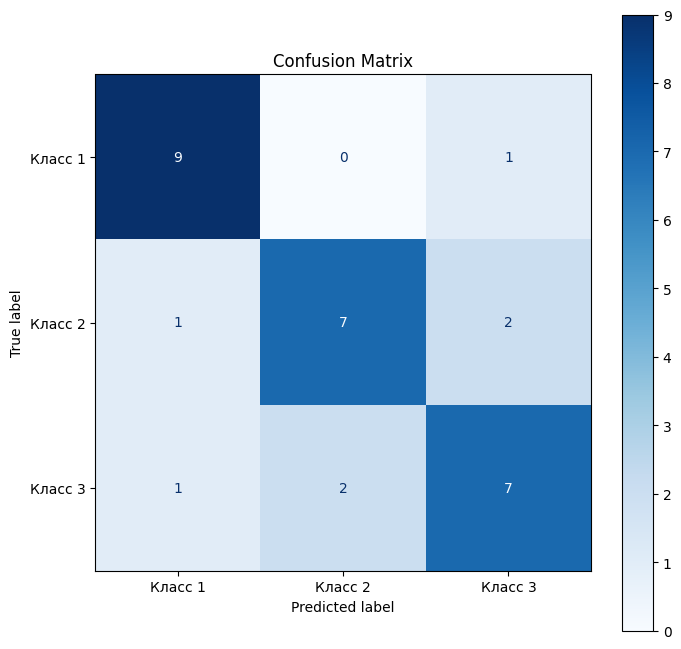

In [35]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=2)

# Создаем матрицу ошибок
cm = metrics.confusion_matrix(y_test_cl, y_pred_cl)

class_names = ["Класс 1", "Класс 2", "Класс 3"]

# Создаем объект класса ConfusionMatrixDisplay
cmd = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Строим график confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
cmd.plot(ax=ax, cmap="Blues")

# Добавляем название и подписи к графику
ax.set_title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()